# Antes de empezar :
   - Estos ejercicios están relacionados con las lecciones Subconjunto y Estadísticas descriptivas.
   - Tenga en cuenta que necesitará utilizar algunas de las funciones que aprendió en las lecciones anteriores.
   - Todos los conjuntos de datos se proporcionan en la carpeta `your-code` de este laboratorio.
   - Elabora tus códigos y resultados tanto como puedas.
   - Esfuérzate al máximo para responder a las preguntas y completar las tareas y, sobre todo, ¡¡¡disfruta del proceso!!!

#### Importa todas las librerías necesarias

In [246]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Desafío 1

#### En este reto utilizaremos el archivo `Temp_States.csv`. 

#### Primero impórtalo en un marco de datos llamado `temp`.

In [247]:
# YOUR CODE HERE
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`

In [248]:
# your solution here
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore los tipos de datos del marco de datos Temp. ¿Qué tipo de datos tenemos? Comenta tu resultado.

In [249]:
# YOUR CODE HERE
print(temp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 300.0+ bytes
None


#### Selecciona las filas en las que el estado es New York

In [250]:
# YOUR CODE HERE
ny_temp = temp.copy()
ny_temp = ny_temp[ny_temp["State"] == "New York"]
ny_temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### ¿Cuál es la temperatura media de las ciudades de Nueva York?

In [251]:
# YOUR CODE HERE
ny_temp["Temperature"].mean()


10.74074074074074

#### Queremos conocer las ciudades y estados con temperaturas superiores a 15 grados centígrados.

In [252]:
# your answer here
city_more_15c = temp.copy()
city_more_15c = city_more_15c[city_more_15c["Temperature"] > 15]
city_more_15c


,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Ahora, devuelva sólo las ciudades que tengan una temperatura superior a 15 grados centígrados.

In [253]:
# YOUR CODE HERE
city_more_15c[["City","Temperature"]]

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222
5,Treton,22.222222
6,Newark,20.000000


#### Queremos saber qué ciudades tienen una temperatura superior a 15 grados Celcius e inferior a 20 grados Celcius

*Pista: Primero escriba la condición y luego seleccione las filas.

In [254]:
# YOUR CODE HERE
city_temp_15_20 = temp.copy()
city_temp_15_20 = city_temp_15_20[city_temp_15_20["Temperature"].between(15, 20, inclusive="neither")] 

city_temp_15_20

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


#### Halla la media y la desviación estándar de la temperatura de cada estado.

*Pista: Utiliza las funciones de la lección Manipulación de datos*.

In [255]:
# YOUR CODE HERE
temperature_by_state = temp.groupby('State')['Temperature'].agg(['mean', 'std'])
temperature_by_state

,mean,std
State,,
Connecticut,15.833333,1.964186
New Jersey,21.111111,1.571348
New York,10.740741,8.133404


# Desafío 2

#### Cargar el fichero `employee.csv` en un DataFrame. Llama al dataframe `employee`.

In [256]:
# YOUR CODE HERE
employee = pd.read_csv('Employee.csv')

#### Explore los tipos de datos del marco de datos Temp. Comenta tus resultados

In [257]:
# YOUR CODE HERE
print(employee.info())
employee

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 636.0+ bytes
None


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Muestre visualmente la distribución de frecuencias (histograma) del conjunto de datos de empleados. Describa en pocas palabras estos histogramas.

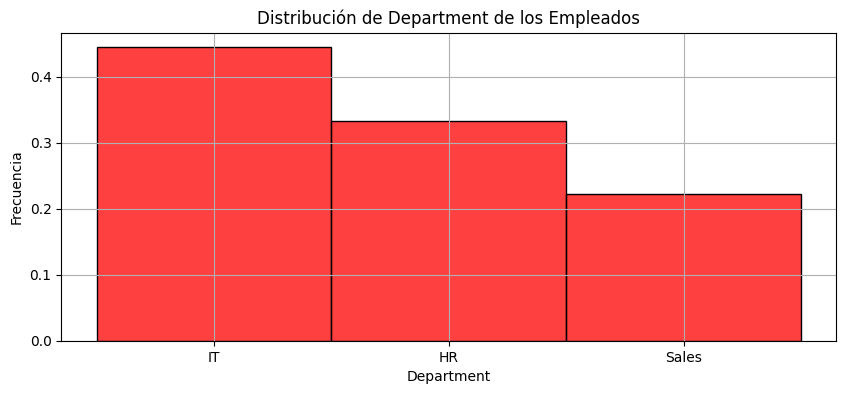

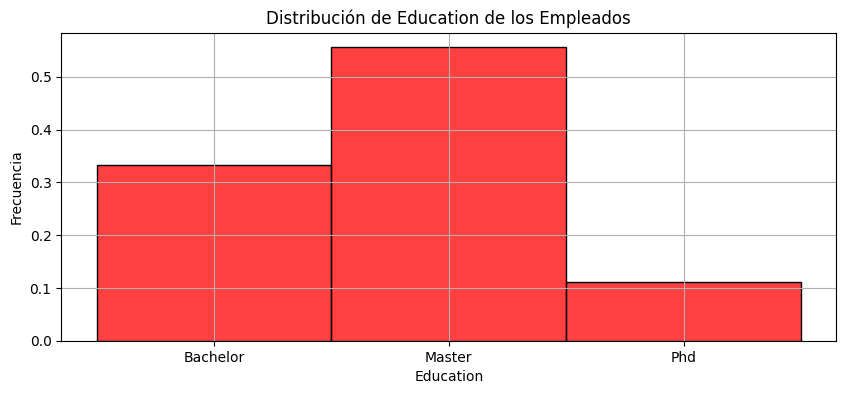

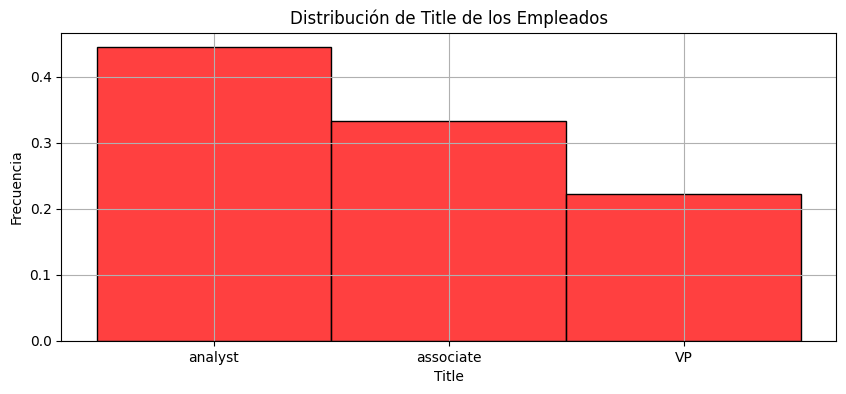

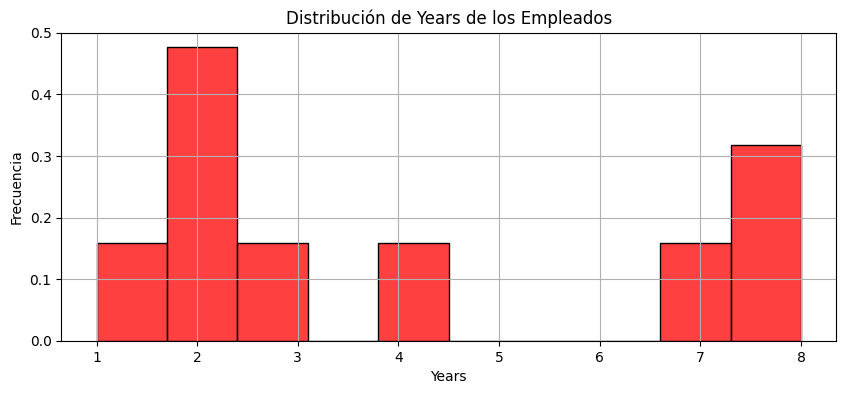

In [258]:
import matplotlib.pyplot as plt
import seaborn as sns

for columna in employee.iloc[:, [1,2, 4,5]]:
    plt.figure(figsize=(10, 4))
    sns.histplot(employee[f'{columna}'], bins=(employee[f'{columna}'].count()+1), color='r',element='bars',stat='density')
    plt.title(f'Distribución de {columna} de los Empleados')
    plt.xlabel(f'{columna}')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

#### ¿Cuál es el salario medio en esta empresa?

In [259]:
# YOUR CODE HERE

salary_mean = employee['Salary'].mean().__round__(2)
salary_mean

48.89

#### ¿Cuál es el salario más alto?

In [260]:
# YOUR CODE HERE
max_salary = employee['Salary'].max()
max_salary
who_max_salary = employee[employee["Salary"] == max_salary]
who_max_salary[['Name','Salary']]

,Name,Salary
6,Carlos,70
8,Ana,70


#### ¿Cuál es el salario más bajo?

In [261]:
# YOUR CODE HERE
min_salary = employee['Salary'].min()
min_salary

30

#### ¿Quiénes son los empleados con el salario más bajo?

In [262]:
# YOUR CODE HERE
who_min_salary = employee[employee["Salary"] == min_salary]
who_min_salary[['Name','Salary']]

,Name,Salary
1,Maria,30
2,David,30


#### ¿Podría darnos toda la información sobre un empleado llamado David?

In [263]:
# YOUR CODE HERE
print(employee.iloc[2])

# OR 

david = employee[employee['Name'] == "David"]
david

Name            David
Department         HR
Education      Master
Gender              M
Title         analyst
Years               2
Salary             30
Name: 2, dtype: object


,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### ¿Podría dar sólo el sueldo de David?

In [264]:
# YOUR CODE HERE

salary_david = employee.loc[employee['Name'] == "David", 'Salary'].squeeze()
salary_david

30

#### Printea todas las líneas en las que el cargo es asociado

In [265]:
# YOUR CODE HERE
asociados = employee[employee['Title'] == 'associate']
asociados

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


In [266]:
def color_red_associate(val):
    color = 'green' if val == "associate" else 'white'
    return 'color: %s' % color

employee.style.map(color_red_associate)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Printea las 3 primeras filas de tu dataframe

##### Consejo : Hay 2 maneras de hacerlo. Hazlo de las dos maneras

In [267]:
# YOUR CODE HERE
print(employee.head(3))
print(employee.iloc[:3])

    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30
    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


In [268]:
# YOUR CODE HERE
print(employee[:3])
print(employee.loc[:2])

    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30
    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


#### ¿Encuentra a los empleados cuyo cargo es asociado y cuyo salario es superior a 55?

In [269]:
# YOUR CODE HERE
asociados_55 = employee[(employee['Title'] == 'associate') & (employee['Salary'] > 55)]
asociados_55

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Agrupa a los empleados en función del número de años que llevan trabajando. ¿Cuáles son los salarios medios de cada grupo?

In [270]:
# YOUR CODE HERE
years = employee.groupby('Years')['Salary'].agg(['mean'])
years

,mean
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


#### ¿Cuál es el salario medio por título?

In [271]:
# YOUR CODE HERE
titles = employee.groupby('Title')['Salary'].agg(['mean'])
titles

,mean
Title,
VP,70.000000
analyst,32.500000
associate,56.666667


#### Muestra un resumen visual de los datos utilizando boxplot. ¿Cuáles son los cuartiles primero y tercero? Comenta tus resultados.

* Pista : Cuantiles vs Cuartiles*.
En Probabilidad y Estadística, los cuantiles son puntos de corte que dividen el rango de una distribución de probabilidad en intervalos continuos con probabilidades iguales. Cuando la división es en cuatro partes, los valores de la variable correspondientes al 25%, 50% y 75% de la distribución total se denominan cuartiles.

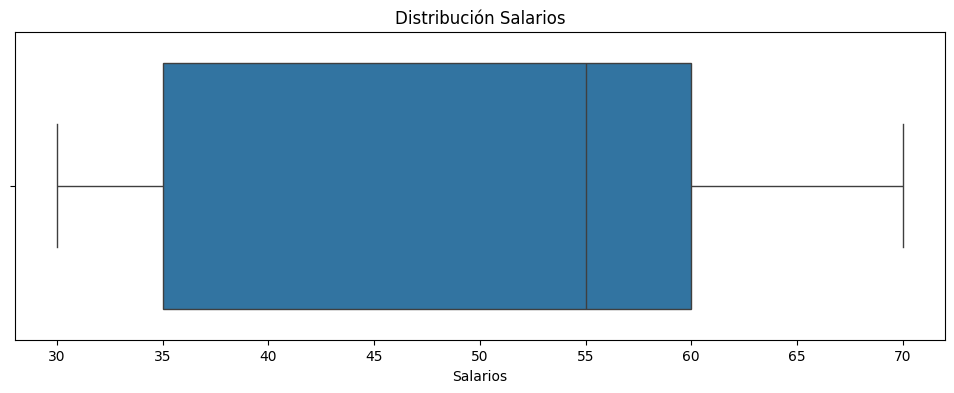

In [272]:
# YOUR CODE HERE
plt.figure(figsize=(12, 4))
sns.boxplot(x='Salary', data=employee)
plt.title('Distribución Salarios')
plt.xlabel('Salarios')
plt.show()

In [273]:
# print first quartile here
q1 = employee['Salary'].quantile(0.25)
print(f"(Q1): {q1}")

(Q1): 35.0


In [274]:
# print third quartile here
q3 = employee['Salary'].quantile(0.75)
print(f"(Q3): {q3}")

(Q3): 60.0


#### ¿Es diferente el salario medio por género?

In [275]:
# your answer here
gender = employee.groupby('Gender')['Salary'].mean().reset_index()

print(gender)
print("Si hay diferencia")


  Gender  Salary
0      F    47.5
1      M    50.0
Si hay diferencia


#### Encuentra el mínimo, la media y el máximo de todas las columnas numéricas para cada Departamento.

##### Sugerencia: Utiliza las funciones de la lección Manipulación de Datos

In [276]:
# your answer here
employee.groupby('Department').describe()

Years                                                Salary         \
           count      mean       std  min   25%  50%   75%  max  count   mean   
Department                                                                      
HR           3.0  4.666667  3.055050  2.0  3.00  4.0  6.00  8.0    3.0  45.00   
IT           4.0  4.500000  3.511885  1.0  1.75  4.5  7.25  8.0    4.0  48.75   
Sales        2.0  2.500000  0.707107  2.0  2.25  2.5  2.75  3.0    2.0  55.00   

                                                      
                  std   min    25%   50%   75%   max  
Department                                            
HR          21.794495  30.0  32.50  35.0  52.5  70.0  
IT          19.311050  30.0  33.75  47.5  62.5  70.0  
Sales        0.000000  55.0  55.00  55.0  55.0  55.0

### Pregunta bonus

#### Para cada departamento, calcule la diferencia entre el salario máximo y el salario mínimo.

##### * Sugerencia: pruebe a utilizar `agg` o `apply` y `lambda`*.

In [277]:
# your answer here
department = employee.groupby('Department')['Salary'].agg(
    Max_Salary='max',
    Min_Salary='min',
    Diferencia= lambda x: x.max() - x.min()
)
print(department)

            Max_Salary  Min_Salary  Diferencia
Department                                    
HR                  70          30          40
IT                  70          30          40
Sales               55          55           0


# Desafío 3

#### Abra el conjunto de datos Orders.csv. Nombre el conjunto de datos pedidos

In [278]:
# your answer here

df_orders = pd.read_csv("Orders.csv")
df_orders['InvoiceDate'] = pd.to_datetime(df_orders['InvoiceDate'])
df_orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Explore su conjunto de datos observando los tipos de datos y las estadísticas de resumen. Comenta tus resultados

In [279]:
# your answer here
print(df_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    397924 non-null  int64         
 1   InvoiceNo     397924 non-null  int64         
 2   StockCode     397924 non-null  object        
 3   year          397924 non-null  int64         
 4   month         397924 non-null  int64         
 5   day           397924 non-null  int64         
 6   hour          397924 non-null  int64         
 7   Description   397924 non-null  object        
 8   Quantity      397924 non-null  int64         
 9   InvoiceDate   397924 non-null  datetime64[ns]
 10  UnitPrice     397924 non-null  float64       
 11  CustomerID    397924 non-null  int64         
 12  Country       397924 non-null  object        
 13  amount_spent  397924 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(8), object(3)
memory usage: 

In [280]:
# your answer here
df_orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,InvoiceDate,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,2011-07-10 23:43:36.912475648,3.116174,15294.315171,22.394749
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,2010-12-01 08:26:00,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,NaN,22.096788,1713.169877,309.055588


#### ¿Cuál es el precio medio de compra?

In [281]:
# your answer here
by_invoice = df_orders.groupby('InvoiceNo')['amount_spent'].agg('sum').reset_index()
media_invoice = by_invoice['amount_spent'].mean().__round__(2)
print(f'El ticket medio de compra es de {media_invoice}')

El ticket medio de compra es de 480.76


#### ¿Cuáles fueron los precios de compra más altos y más bajos? 

In [282]:
# your answer here
max_pedido = by_invoice.max()
print(f'El ticket de compra mas alto es {max_pedido[0]:.0f} por un monto de {max_pedido[1]:.2f}')

El ticket de compra mas alto es 581587 por un monto de 168469.60


C:\Users\Aleja\AppData\Local\Temp\ipykernel_15008\653527489.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'El ticket de compra mas alto es {max_pedido[0]:.0f} por un monto de {max_pedido[1]:.2f}')


In [283]:
# your answer here
min_pedido = by_invoice.min()
print(f'El ticket de compra mas alto es {min_pedido[0]:.0f} por un monto de {min_pedido[1]:.2f}')

El ticket de compra mas alto es 536365 por un monto de 0.00


C:\Users\Aleja\AppData\Local\Temp\ipykernel_15008\3895397391.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'El ticket de compra mas alto es {min_pedido[0]:.0f} por un monto de {min_pedido[1]:.2f}')


#### Seleccione todos los clientes que tenemos en España

In [284]:
# your answer here
df_orders_spain = df_orders[df_orders['Country'] == 'Spain']
print(df_orders_spain.head())

      Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
4250        6421     536944     22383  2010     12    5    12   
4251        6422     536944     22384  2010     12    5    12   
4252        6423     536944     20727  2010     12    5    12   
4253        6424     536944     20725  2010     12    5    12   
4254        6425     536944     20728  2010     12    5    12   

                  Description  Quantity         InvoiceDate  UnitPrice  \
4250  lunch bag suki  design         70 2010-12-03 12:20:00       1.65   
4251  lunch bag pink polkadot       100 2010-12-03 12:20:00       1.45   
4252  lunch bag  black skull.        60 2010-12-03 12:20:00       1.65   
4253  lunch bag red retrospot        70 2010-12-03 12:20:00       1.65   
4254      lunch bag cars blue       100 2010-12-03 12:20:00       1.45   

      CustomerID Country  amount_spent  
4250       12557   Spain         115.5  
4251       12557   Spain         145.0  
4252       12557   Spain          99.0  


#### ¿Cuántos clientes tenemos en España?
##### Pista : Utiliza value_counts()

In [285]:
# your answer here
spain = df_orders_spain['CustomerID'].value_counts().count()
print(f'El nº total de clientes en España es de {spain}')

El nº total de clientes en España es de 30


#### Selecciona todos los clientes que han comprado más de 50 artículos ?

In [286]:
# your answer here
customer_total_articulos = df_orders.groupby('CustomerID')['StockCode'].agg('count').reset_index()
up50 = customer_total_articulos[customer_total_articulos['StockCode'] > 50]
up50['CustomerID']

1       12347
3       12349
5       12352
7       12354
9       12356
        ...  
4320    18260
4323    18263
4328    18272
4337    18283
4338    18287
Name: CustomerID, Length: 1908, dtype: int64

#### Selecciona pedidos de España superiores a 50 artículos

In [287]:
# your answer here
by_invoice_spain = df_orders[df_orders['Country']=='Spain'].groupby('InvoiceNo')['StockCode'].agg('count').reset_index()
by_invoice_spain_up50 = by_invoice_spain[by_invoice_spain['StockCode']>50]
by_invoice_spain_up50

,InvoiceNo,StockCode
4,540469,98
5,540550,93
11,542303,93
25,550911,58
34,557007,61
44,559665,67
55,564734,122
61,567653,57
70,572065,54
73,573362,116


#### Seleccionar todos los pedidos gratuitos

In [288]:
# your answer here
orders_free = by_invoice[by_invoice['amount_spent']==0]
orders_free

,InvoiceNo,amount_spent
2721,543599,0.0
11301,564651,0.0
12848,568384,0.0
17360,578841,0.0


#### Seleccionar todos los pedidos que sean 'lunch bag
#### Pista: Utilice las funciones de cadena

In [289]:
# your answer here

lunch_bag = df_orders[df_orders['Description'].str.lower().str.contains('lunch bag', case=False)]
lunch_bag


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Seleccione todos los pedidos realizados en 2011 y que sean «lunch bag».  

In [290]:
# your answer here
lunch_bag_2011 = lunch_bag[lunch_bag['InvoiceDate'].dt.year == 2011]
lunch_bag_2011

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Muestra la distribución de frecuencias del importe gastado en España.

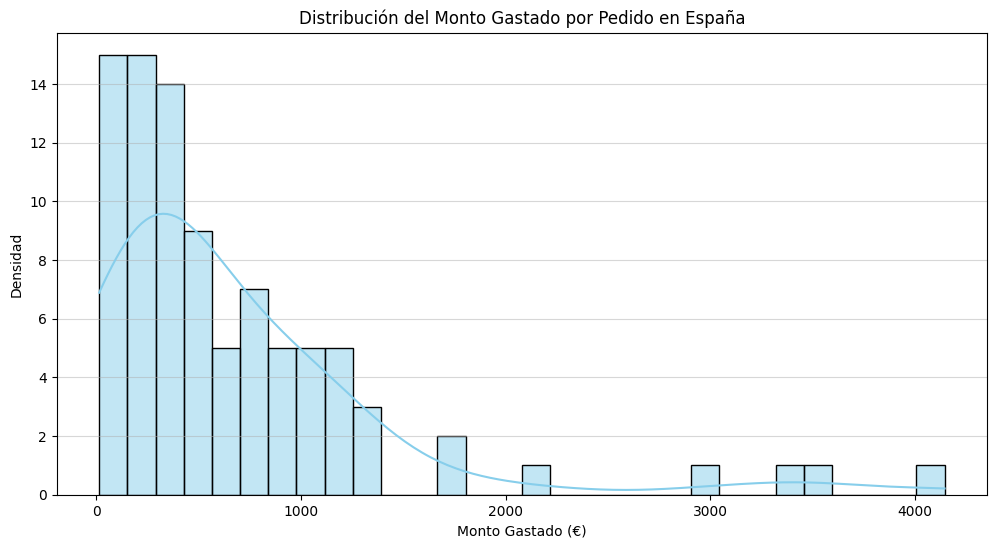

In [291]:
# your answer here

amount_by_invoice_spain = df_orders[df_orders['Country']=='Spain'].groupby('InvoiceNo')['amount_spent'].agg('sum').reset_index()
plt.figure(figsize=(12, 6))  
num_unique_values = amount_by_invoice_spain['amount_spent'].nunique()
bins = min(num_unique_values, 20)
sns.histplot(amount_by_invoice_spain['amount_spent'], bins=bins+10, color='skyblue',kde=True) 
plt.title('Distribución del Monto Gastado por Pedido en España')
plt.xlabel('Monto Gastado (€)')
plt.ylabel('Densidad')
plt.grid(axis='y', alpha=0.5)
plt.show()


#### Seleccione todos los pedidos realizados en el mes de agosto

In [292]:
# your answer here
df_orders_agosto = df_orders[df_orders['InvoiceDate'].dt.month == 8]
df_orders_agosto

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,320688,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,320689,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,320690,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,320691,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Seleccione cuántos pedidos se realizan por países en el mes de agosto
##### Pista: Utilice value_counts()

In [293]:
# your answer here
df_orders_agosto_inv = df_orders_agosto.groupby('Country')['InvoiceNo'].agg('count').sort_values(ascending=False)
print(f'El total de pedidos en el mes de agostos por paises es de: \n{df_orders_agosto_inv}')

El total de pedidos en el mes de agostos por paises es de: 
Country
United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: InvoiceNo, dtype: int64


#### ¿Cuál es el gasto medio por país?

In [294]:
# your answer here
media_por_pais = df_orders.groupby('Country')['amount_spent'].agg('mean').sort_values(ascending=False)
print(f'El total de pedidos en el mes de agostos por paises es de: \n{media_por_pais}')

El total de pedidos en el mes de agostos por paises es de: 
Country
Netherlands             120.798282
Australia               116.895620
Japan                   116.561900
Singapore                95.852658
Sweden                   85.096075
Denmark                  49.882474
Lithuania                47.458857
Lebanon                  37.641778
EIRE                     36.687745
Brazil                   35.737500
Norway                   33.736418
Czech Republic           33.069600
Finland                  32.913985
Greece                   32.831172
Bahrain                  32.258824
Switzerland              30.642752
Israel                   29.119718
United Arab Emirates     27.974706
Channel Islands          27.340160
Austria                  25.624824
Germany                  25.311562
France                   25.056827
Spain                    24.779521
Malta                    24.335625
Canada                   24.280662
Iceland                  23.681319
Italy                 

#### ¿Cuál es el artículo más caro?

In [314]:
# your answer here
articulo_caro = df_orders[df_orders['UnitPrice']==df_orders['UnitPrice'].max()].reset_index()
print(f'El artículo mas caro es {articulo_caro['Description'][0]}, cuyo valor es de {articulo_caro['UnitPrice'][0]} ')

El artículo mas caro es postage, cuyo valor es de 8142.75 


#### ¿Cuál fue la cantidad media gastada al año?

In [315]:
# your answer here
media_anual = df_orders.groupby('year')['amount_spent'].agg('mean')
media_anual

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64